In [76]:
import os
from tensorflow.keras import Model
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [52]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

data_dir = os.path.join(os.path.dirname(os.path.abspath('.')), 'data')
local_weights_file = os.path.join(data_dir, 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

data_dir = os.path.join(os.path.dirname(os.path.abspath('.')), 'data')
train_dir = os.path.join(data_dir, 'training-cat-or-dogs')
validation_dir = os.path.join(data_dir, 'validation-cat-or-dogs')

train_dir_dogs = os.path.join(train_dir, 'dogs')
train_dir_cats = os.path.join(train_dir, 'cats')

validation_dir_dogs = os.path.join(validation_dir, 'dogs')
validation_dir_cats = os.path.join(validation_dir, 'cats')

print(train_dir_dogs)
print(train_dir_cats)

print(validation_dir_dogs)
print(validation_dir_cats)

print('Total training cat images: ', len(os.listdir(train_dir_cats)))
print('Total training dog images: ', len(os.listdir(train_dir_dogs)))

print('Total validation cat images: ', len(os.listdir(validation_dir_cats)))
print('Total validation dog images: ', len(os.listdir(validation_dir_dogs)))

D:\CProgrammingLanguage\tf-specialization\course2\data\training-cat-or-dogs\dogs
D:\CProgrammingLanguage\tf-specialization\course2\data\training-cat-or-dogs\cats
D:\CProgrammingLanguage\tf-specialization\course2\data\validation-cat-or-dogs\dogs
D:\CProgrammingLanguage\tf-specialization\course2\data\validation-cat-or-dogs\cats
Total training cat images:  1000
Total training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500


In [53]:
# Pretrained model with include_top
#pre_trained_model = InceptionV3(
#    weights = None,
#    include_top = True, # include top means include both the Feature Extraction (Conv) and Classifier (Dense)
#    #input_shape = (150, 150, 3)
#)

#pre_trained_model.summary()

In [54]:
#pretrained model without top
pre_trained_model = InceptionV3(
    weights = None,
    include_top = False,
    input_shape = (150, 150, 3)
)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
    
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_658 (Conv2D)             (None, 74, 74, 32)   864         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_658 (BatchN (None, 74, 74, 32)   96          conv2d_658[0][0]                 
__________________________________________________________________________________________________
activation_658 (Activation)     (None, 74, 74, 32)   0           batch_normalization_658[0][0]    
_______________________________________________________________________________________

In [72]:
last_layer = pre_trained_model.get_layer('mixed10')
last_layer_output = last_layer.output

# New classifier here
pool_layer = tf.keras.layers.GlobalAveragePooling2D()(last_layer_output)
#pool_layer = tf.keras.layers.Flatten()(last_layer_output)
dense1 = tf.keras.layers.Dense(units = 512, activation = 'relu')(pool_layer)
output = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(dense1)

model = tf.keras.Model(inputs = pre_trained_model.input, outputs = output)

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1.0/255)

test_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    x = train_generator, 
    epochs = 15,
    validation_data = validation_generator,
    verbose = 2
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 65s - loss: 0.7145 - accuracy: 0.6970 - val_loss: 0.4581 - val_accuracy: 0.8950
Epoch 2/15
100/100 - 60s - loss: 0.4526 - accuracy: 0.8005 - val_loss: 0.2791 - val_accuracy: 0.9390
Epoch 3/15
100/100 - 58s - loss: 0.3750 - accuracy: 0.8320 - val_loss: 0.4562 - val_accuracy: 0.9340
Epoch 4/15
100/100 - 61s - loss: 0.3130 - accuracy: 0.8855 - val_loss: 0.7167 - val_accuracy: 0.8720
Epoch 5/15
100/100 - 59s - loss: 0.2204 - accuracy: 0.9135 - val_loss: 3.9137 - val_accuracy: 0.6230
Epoch 6/15
100/100 - 58s - loss: 0.1991 - accuracy: 0.9435 - val_loss: 0.5972 - val_accuracy: 0.9160
Epoch 7/15
100/100 - 58s - loss: 0.1173 - accuracy: 0.9680 - val_loss: 0.6793 - val_accuracy: 0.9350
Epoch 8/15
100/100 - 57s - loss: 0.0998 - accuracy: 0.9705 - val_loss: 1.6492 - val_accuracy: 0.8870
Epoch 9/15
100/100 - 57s - loss: 0.0686 - accuracy: 0.9825 - val_

<Figure size 432x288 with 0 Axes>

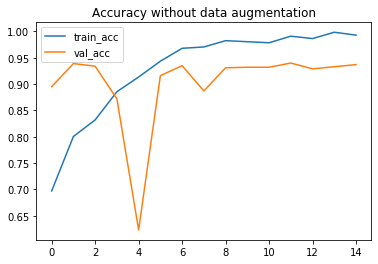

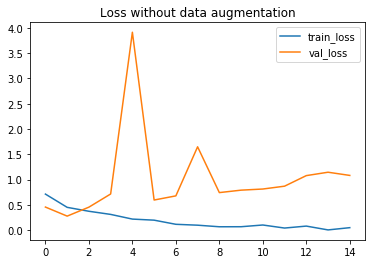

<Figure size 432x288 with 0 Axes>

In [77]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epoches = np.arange(15)

plt.plot(epoches, acc, label='train_acc')
plt.plot(epoches, val_acc, label='val_acc')
plt.title('Accuracy without data augmentation')
plt.legend()
plt.figure()

plt.plot(epoches, loss, label='train_loss')
plt.plot(epoches, val_loss, label='val_loss')
plt.title('Loss without data augmentation')
plt.legend()
plt.figure()

In [46]:
inputs = tf.keras.Input(shape=(3,))
inner = tf.keras.layers.Dense(units=10)(inputs)
output = tf.keras.layers.Dense(units=3)(inner)
model = tf.keras.Model(inputs = inputs, outputs = output)

In [47]:
output

<tf.Tensor 'dense_13/Identity:0' shape=(None, 3) dtype=float32>

In [44]:
inputs

<tf.Tensor 'input_12:0' shape=(None, 3) dtype=float32>